In [1]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.


## Linear Programming Problem (LPP)
### Q.1

\begin{aligned}
\text{Maximize:} \quad & Z = 3x_1 + 5x_2 \\
\text{Subject to:} \quad 
& 2x_1 + x_2 \le 20 \\
& x_1 + 3x_2 \le 30 \\
& x_1, x_2 \ge 0
\end{aligned}


In [2]:
import pulp as p
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a maximization problem
model = p.LpProblem("LPP", p.LpMaximize)
model

LPP:
MAXIMIZE
None
VARIABLES

In [4]:
# Decision variables
x1 = p.LpVariable("x1", lowBound=0)
x2 = p.LpVariable("x2", lowBound=0)
x1,x2

(x1, x2)

In [5]:
# Objective function
model += 3*x1 + 5*x2

In [6]:
# Constraints
model += 2*x1 + x2 <= 20
model += x1 + 3*x2 <= 30
model

LPP:
MAXIMIZE
3*x1 + 5*x2 + 0
SUBJECT TO
_C1: 2 x1 + x2 <= 20

_C2: x1 + 3 x2 <= 30

VARIABLES
x1 Continuous
x2 Continuous

In [7]:
# Solve the problem
model.solve()

1

In [8]:
print("Status:", p.LpStatus[model.status])
print("Optimal Z:", p.value(model.objective))
print("x1 =", p.value(x1))
print("x2 =", p.value(x2))

Status: Optimal
Optimal Z: 58.0
x1 = 6.0
x2 = 8.0


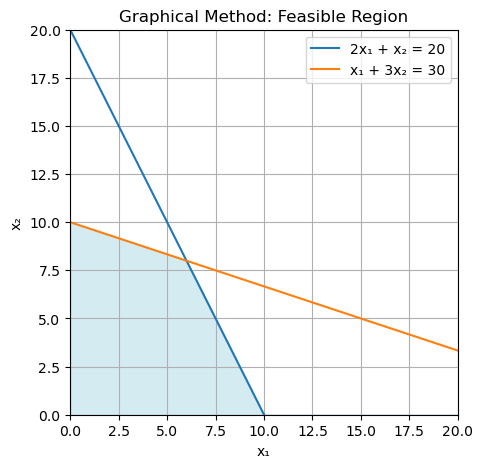

In [9]:
# Define lines
x = np.linspace(0, 20, 400)
y1 = 20 - 2*x          # 2x1 + x2 = 20
y2 = (30 - x)/3        # x1 + 3x2 = 30

# Feasible region boundary
plt.figure(figsize=(5,5))
plt.plot(x, y1, label="2x₁ + x₂ = 20")
plt.plot(x, y2, label="x₁ + 3x₂ = 30")

# Feasible region shading
y_feasible = np.minimum(y1, y2)
y_feasible = np.maximum(0, y_feasible)
plt.fill_between(x, 0, y_feasible, where=(y_feasible >= 0), 
                 color='lightblue', alpha=0.5)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Graphical Method: Feasible Region")
plt.legend()
plt.grid(True)


plt.show()

### Q.2

\begin{aligned}
\text{Minimize:}  \quad & Z = 4x + 3y \\
\text{Subject to:} \quad 
& x + y  \ge 4 \\
& x + 2y  \ge 6 \\
& x_1, x_2 \ge 0
\end{aligned}

In [12]:
problem = p.LpProblem("Min_Problem", p.LpMinimize)

In [13]:
x = p.LpVariable("x", lowBound=0)
y = p.LpVariable("y", lowBound=0)


In [14]:
problem += 4*x + 3*y

In [15]:
problem += x + y >= 4
problem += x + 2*y >= 6

In [16]:
problem

Min_Problem:
MINIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + y >= 4

_C2: x + 2 y >= 6

VARIABLES
x Continuous
y Continuous

In [20]:
problem.solve()

1

In [22]:
print("Status:", p.LpStatus[problem.status])
print("x =", x.value())
print("y =", y.value())
print("Min Z =", p.value(problem.objective))

Status: Optimal
x = 0.0
y = 4.0
Min Z = 12.0


In [25]:
# Lines
x_vals = np.linspace(0, 10, 200)
y1 = 4 - x_vals        # x + y = 4
y2 = (6 - x_vals) / 2  # x + 2y = 6


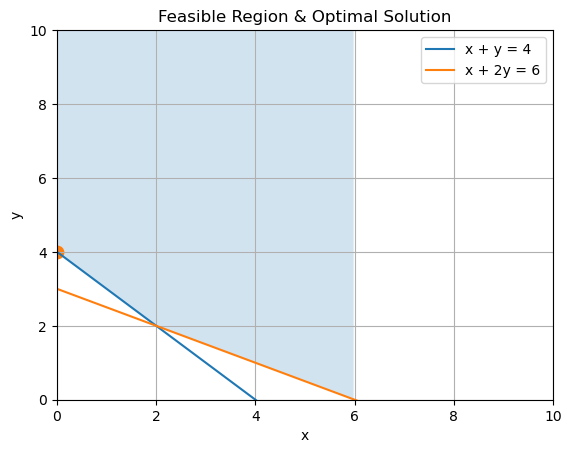

In [31]:

plt.plot(x_vals, y1, label="x + y = 4")
plt.plot(x_vals, y2, label="x + 2y = 6")

y_min = np.maximum(y1, y2)
y_min[y_min < 0] = np.nan
plt.fill_between(x_vals, y_min, 20, alpha=0.2)

plt.scatter(x.value(), y.value(), s=80)

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Feasible Region & Optimal Solution")
plt.legend()
plt.grid(True)
plt.show()

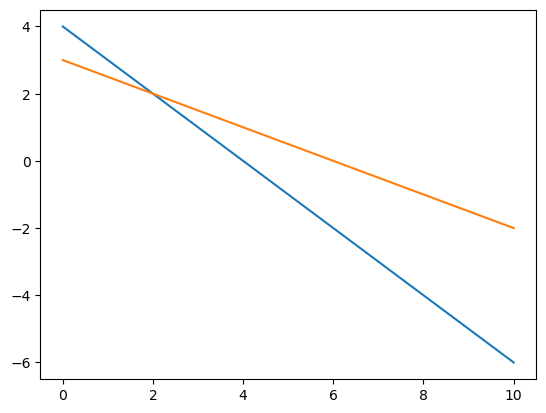

In [32]:
# Plot
plt.plot(x_vals, y1, label="x + y = 4")
plt.plot(x_vals, y2, label="x + 2y = 6")



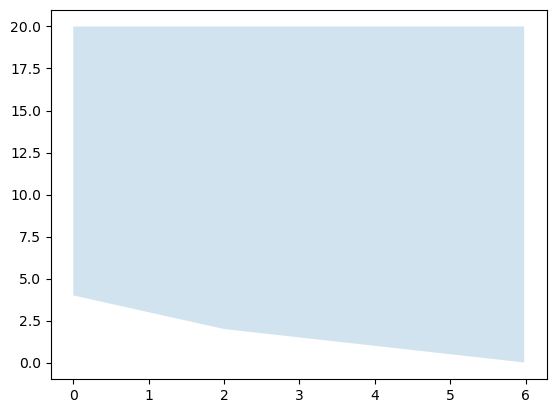

In [28]:
# Feasible region shading
y_min = np.maximum(y1, y2)
y_min[y_min < 0] = np.nan
plt.fill_between(x_vals, y_min, 20, alpha=0.2)

C:\Users\dell\AppData\Local\Temp\ipykernel_692\2346156769.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


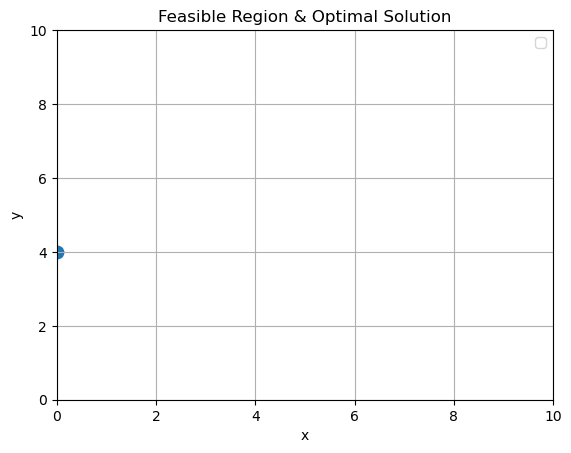

In [29]:
# Optimal point
plt.scatter(x.value(), y.value(), s=80)

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Feasible Region & Optimal Solution")
plt.legend()
plt.grid(True)
plt.show()